In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
data_set = pd.read_csv('/content/drive/MyDrive/hw1/Disease_symptom_and_patient_profile_dataset.csv')
data_set.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [ ]:
label_encoder = LabelEncoder()                                               # changing names to values  0,1,2,...
data_set['Fever'] = label_encoder.fit_transform(data_set['Fever'])

label_encoder = LabelEncoder()
data_set['Cough'] = label_encoder.fit_transform(data_set['Cough'])

label_encoder = LabelEncoder()
data_set['Fatigue'] = label_encoder.fit_transform(data_set['Fatigue'])

label_encoder = LabelEncoder()
data_set['Difficulty Breathing'] = label_encoder.fit_transform(data_set['Difficulty Breathing'])

label_encoder = LabelEncoder()
data_set['Gender'] = label_encoder.fit_transform(data_set['Gender'])

label_encoder = LabelEncoder()
data_set['Blood Pressure'] = label_encoder.fit_transform(data_set['Blood Pressure'])

label_encoder = LabelEncoder()
data_set['Cholesterol Level'] = label_encoder.fit_transform(data_set['Cholesterol Level'])

data_set.head(10)


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,Positive
1,Common Cold,0,1,1,0,25,0,2,2,Negative
2,Eczema,0,1,1,0,25,0,2,2,Negative
3,Asthma,1,1,0,1,25,1,2,2,Positive
4,Asthma,1,1,0,1,25,1,2,2,Positive
5,Eczema,1,0,0,0,25,0,2,2,Positive
6,Influenza,1,1,1,1,25,0,2,2,Positive
7,Influenza,1,1,1,1,25,0,2,2,Positive
8,Hyperthyroidism,0,1,0,0,28,0,2,2,Negative
9,Hyperthyroidism,0,1,0,0,28,0,2,2,Negative


In [ ]:
onehot = OneHotEncoder(sparse=False)
disease = onehot.fit_transform(data_set[['Disease']])
disease_column = pd.DataFrame(disease, columns=onehot.get_feature_names_out(['Disease']))
data_set = data_set.drop('Disease', axis=1)
data_set = pd.concat([disease_column, data_set], axis=1)


data_set.head(10)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Disease_Acne,Disease_Allergic Rhinitis,Disease_Alzheimer's Disease,Disease_Anemia,Disease_Anxiety Disorders,Disease_Appendicitis,Disease_Asthma,Disease_Atherosclerosis,Disease_Autism Spectrum Disorder (ASD),Disease_Bipolar Disorder,...,Disease_Zika Virus,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,1,1,19,0,1,2,Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,1,0,25,0,2,2,Negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,1,0,25,0,2,2,Negative
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,1,0,1,25,1,2,2,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,1,0,1,25,1,2,2,Positive
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,0,25,0,2,2,Positive
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,1,1,1,25,0,2,2,Positive
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,1,1,1,25,0,2,2,Positive
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,28,0,2,2,Negative
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,0,28,0,2,2,Negative


In [ ]:
x = data_set.iloc[:,:-1]
y = data_set.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
def knn(x_train, y_train, x_test, k=4):
    distances = [np.linalg.norm(np.array(x) - np.array(x_test)) for x in x_train.values]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train.iloc[i] for i in k_indices]

    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

y_pred = [knn(x_train, y_train, x) for _, x in x_test.iterrows()]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7428571428571429


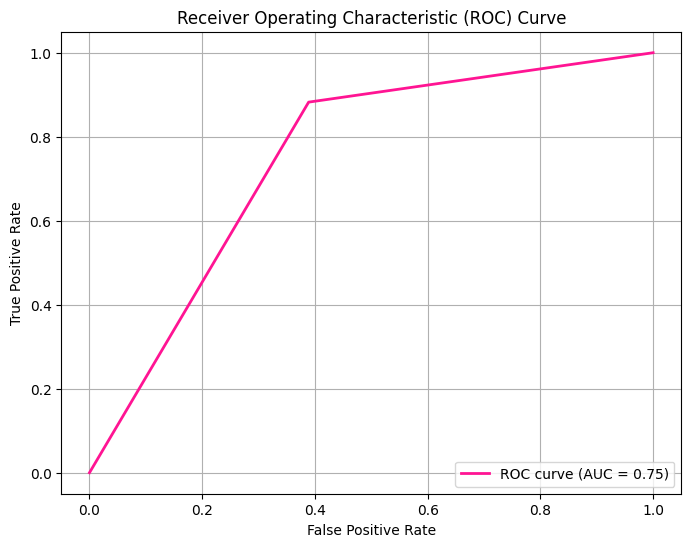

In [ ]:
y_test = label_encoder.fit_transform(y_test)
y_pred = label_encoder.fit_transform(y_pred)

fpr, tpr, threshholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)



# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# Plotting the ROC curve with AUC value
plt.plot(fpr, tpr, color='deeppink', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)



# Labeling the axes and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Showing the legend in the lower right
plt.legend(loc="lower right")

# Display the grid
plt.grid(True)

# Display the plot
plt.show()